<a href="https://colab.research.google.com/github/ash-rulz/Langchain/blob/main/ExpressionLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LangChain Expression Language

In [1]:
!pip install -q -U langchain transformers accelerate

## Example 1: Simple

Simple prompt -> llm -> output parser chain

In [2]:
#from langchain.chat_models import ChatOpenAI
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch
from langchain import HuggingFacePipeline
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

#Define the prompt template
prompt = ChatPromptTemplate.from_template("tell me a short joke about {topic}")

#Define the model
model = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    model_kwargs={"temperature" : 0, "max_length" : 128}
)
llm = HuggingFacePipeline(pipeline=pipeline)

pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

In [8]:
#Define the outpur parser
output_parser = StrOutputParser()

#Chain it all together
chain = prompt | llm | output_parser

#Run the chain
chain.invoke({"topic": "ice cream"})

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


'\nWhy did the ice cream fall on the floor? Because it was too good to be true!'

This is same as:
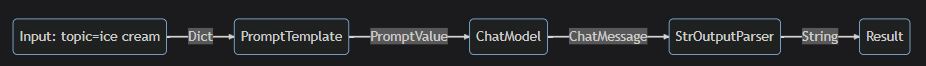

In [11]:
#Investigating what the output of prompt was
prompt_value = prompt.invoke({"topic": "ice cream"})
prompt_value

ChatPromptValue(messages=[HumanMessage(content='tell me a short joke about ice cream')])

In [12]:
#Investigating what the output of llm was
llm_output = llm.invoke(prompt_value)
llm_output

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


'\nWhy did the ice cream fall on the floor? Because it was too good to be true!'

## Example 2: With RAGs
Here we use RAG as a use case, and see how the Langchain expression language can be used. This will help the understand the finer details of how this concept is implemented in [RAG_Langchain](https://colab.research.google.com/drive/1Z4UW-Ia5leLa9YL8g0z5FbXVSHoMfudH#scrollTo=rIOKPJwwQSSv).

str

# References
1. [Langhchain expression language documentation](https://python.langchain.com/docs/expression_language/get_started)
2. [Langchain Expression Language Overview - Part 1](https://www.youtube.com/watch?v=moJRxxEddzU&t=51s)
3. [LangChain Series: Prompt Tools 101 - Simple Prompt Templates](https://www.youtube.com/watch?v=xnZfTuvVVIY&t=1s)
3.